## PHÂN TÍCH SỐ LIỆU CỦA THỬ THÁCH DẬY SỚM LÚC 4H SÁNG (4AM_CHALLENGE)

### Bước 1: Nhập dữ liệu 

Dữ liệu thời gian dậy trong 30 ngày được lưu trữ trong file data.csv định dạng csv

In [134]:
import pandas as pd
raw_data = pd.read_csv("data.csv", index_col=0, sep=';', skipinitialspace = True)
raw_data = raw_data.iloc[::-1] # revese rows
get_up_data = pd.to_datetime(raw_data['GET_UP_TIME'].str.strip(), format='%H:%M')
raw_data['GET_UP_TIME'] = get_up_data

### Bước 2. Hiển thị dữ liệu để kiểm tra 

Cột DAY là số ngày thực hiện thử thách, cột GET_UP_TIME là thời gian dậy của buổi hôm đó (ghi nhận thông qua status Facebook) 

In [126]:
 print(raw_data)

    GET_UP_TIME
DAY            
1      04:05:00
2      04:05:00
3      07:00:00
4      04:05:00
5      07:02:00
6      07:06:00
7      04:05:00
8      04:17:00
9      04:17:00
10     06:17:00
11     06:18:00
12     04:13:00
13     04:14:00
14     04:13:00
15     04:11:00
16     04:45:00
17     08:00:00
18     08:00:00
19     04:05:00
20     07:25:00
21     05:15:00
22     09:47:00
23     07:16:00
24     04:26:00
25     07:53:00
26     06:28:00
27     04:58:00
28     06:26:00
29     06:15:00
30     04:19:00


### Bước 3: Phân tích dữ liệu qua biểu đồ 

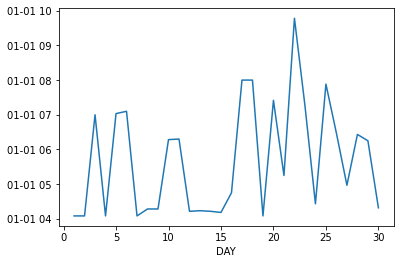

In [135]:
import matplotlib.pyplot as plt
get_up_data.plot()

Nhận xét: trong 1 tuần đầu chưa hình thành thói quen, cứ dậy sớm một hôm sẽ dẫn đến hôm sau bị thiếu ngủ và hôm sau nữa dậy muộn hơn. Sang tuần thứ hai bắt đầu quen nhịp sinh hoạt, có thể duy trì được tỉ lệ dậy sớm khá dài, và chỉ  bị fail lớn vào cuối tuần. Qua ngày 15 bắt đầu mất nhịp sinh hoạt, do chạy deadline nên không duy trì được lịch ngủ sớm như trước, dẫn đến các lần fail cũng muộn hơn và những buổi hoàn thành cũng không được sớm như giai đoạn trước.

### Bước 4: Phân tích một số chỉ số cụ thể 

In [140]:
print(f'Thời gian dậy trung bình: {get_up_data.mean().time()}')

Thời gian dậy trung bình: 05:41:32


In [163]:
import datetime 
count_4_am_success = get_up_data[get_up_data.dt.time < datetime.time(4, 30, 0)].count()
count_5_am_success = get_up_data[get_up_data.dt.time < datetime.time(5, 30, 0)].count()
count_6_am_success = get_up_data[get_up_data.dt.time < datetime.time(6, 30, 0)].count()
count_6_am_failure = get_up_data[get_up_data.dt.time >= datetime.time(6, 30, 0)].count()

print(f'Số buổi dậy lúc 4h30 am: {count_4_am_success}. Tỉ lệ: {count_4_am_success/30*100}%')
print(f'Số buổi dậy trước 5h30 am: {count_5_am_success}. Tỉ lệ: {count_5_am_success/30*100}%')
print(f'Số buổi dậy trước 6h30 am: {count_6_am_success}. Tỉ lệ: {count_6_am_success/30*100}%')
print(f'Số buổi dậy sau 6h30 am: {count_6_am_failure}. Tỉ lệ: {count_6_am_failure/30*100}%')


Số buổi dậy lúc 4h30 am: 13. Tỉ lệ: 43.333333333333336%
Số buổi dậy trước 5h30 am: 16. Tỉ lệ: 53.333333333333336%
Số buổi dậy trước 6h30 am: 21. Tỉ lệ: 70.0%
Số buổi dậy sau 6h30 am: 9. Tỉ lệ: 30.0%


### Kết luận

1. Việc tham gia thử thách 4am_challenge làm giảm đáng kể thời gian dậy trung bình từ 7h00 trước đây xuống 5h41 
2. Giai đoạn đầu tham gia thử thách là khó khăn nhất. Sau 1 tuần đầu tiên thì có thể duy trì được lịch sinh hoạt mới 
3. Đi ngủ sớm là yếu tố mấu chốt đối với việc dậy sớm. Yếu tố thứ hai là phải duy trì đều đặn. 